<a href="https://colab.research.google.com/github/perses08/Brain_Tumor_Seg/blob/main/Tumor_Seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Brain Tumor Data visualization 

In [25]:
import os 
import nibabel as nib #for loading nifti images(MRI)
import matplotlib.pyplot as plt
from  ipywidgets import interact,interactive
import numpy as np
import json
from tensorflow.keras import backend as K
import tensorflow as tf
import tensorflow.keras.layers as l

This data set is from  [Medical Segmentation Decathlon ](https://decathlon-10.grand-challenge.org/)

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.listdir('/content/drive/MyDrive/')

['Colab Notebooks', 'Task01_BrainTumour.tar', '.ipynb_checkpoints']

In [4]:
!tar xf '/content/drive/MyDrive/Task01_BrainTumour.tar'

In [29]:
data_dir = 'Task01_BrainTumour/'
os.listdir('Task01_BrainTumour/')

['._dataset.json',
 '._imagesTr',
 'imagesTs',
 '._imagesTs',
 '._labelsTr',
 'imagesTr',
 'dataset.json',
 'labelsTr']

In [6]:
img_path = 'Task01_BrainTumour/imagesTr/BRATS_001.nii.gz'

In [7]:
img = nib.load(img_path)
img_data = img.get_fdata()
img_data.shape

(240, 240, 155, 4)

(-0.5, 239.5, 239.5, -0.5)

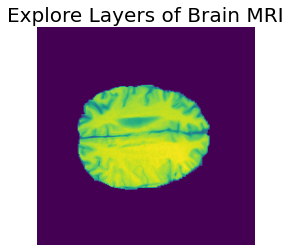

In [26]:
plt.imshow(img_data[:, :, 105,1 ])
plt.title('Explore Layers of Brain MRI', fontsize=20)
plt.axis('off')

In [9]:
#interactive visualization with Ipython_Widgets
def explore_3dimage(layer):
    plt.figure(figsize=(10, 5))
    channel = 1
    plt.imshow(img_data[:, :, layer, channel], cmap='gray');
    plt.title('Explore Layers of Brain MRI', fontsize=20)
    plt.axis('off')
    return layer

# Run the ipywidgets interact() function to explore the data
interact(explore_3dimage, layer=(0, img_data.shape[2] - 1));

interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

In [10]:
label_path = 'Task01_BrainTumour/labelsTr/BRATS_001.nii.gz'

In [50]:
label = nib.load(label_path)
label_data = label.get_fdata()
print(label_data.shape)

y = tf.keras.utils.to_categorical(label_data, num_classes = 4)
print(y[:,:,:,0])

(240, 240, 155)
[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 ...

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 

In [12]:
def explore_3dimage(layer):
    plt.figure(figsize=(10, 5))
    plt.imshow(label_data[:, :, layer], cmap='gray');
    plt.title('Explore Layers of Brain MRI', fontsize=20)
    plt.axis('off')
    return layer

interact(explore_3dimage, layer=(0, label_data.shape[2] - 1));

interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

(240, 240)
(240, 240)
(240, 240)
(240, 240)


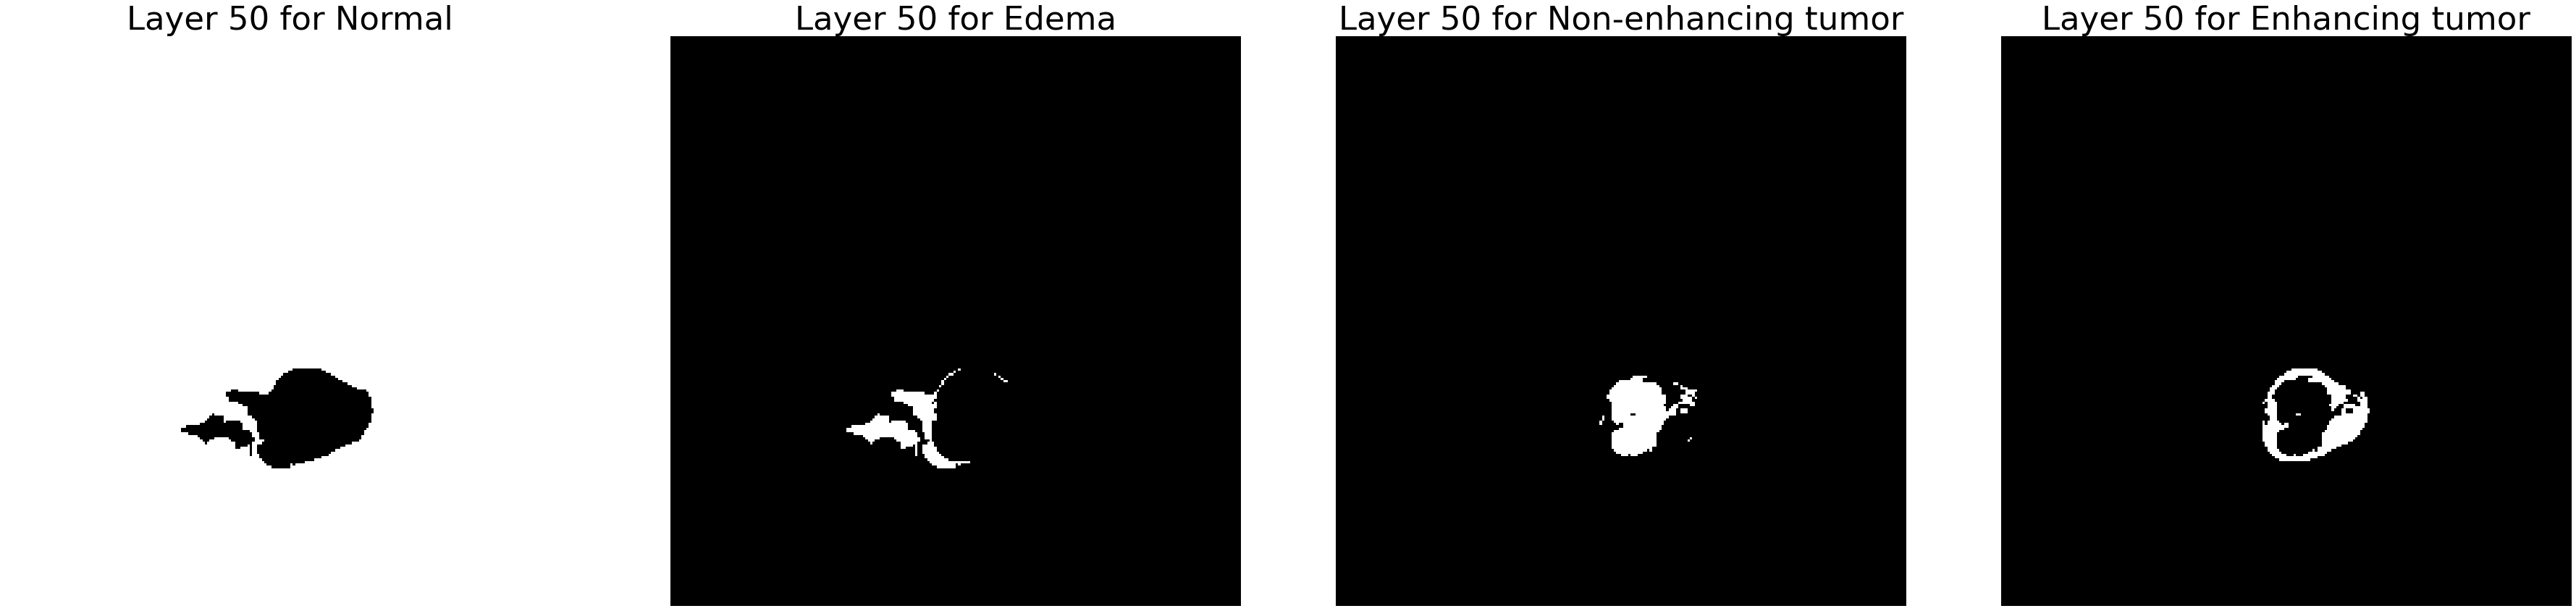

In [13]:
layer = 50
classes_dict = {
    'Normal': 0.,
    'Edema': 1.,
    'Non-enhancing tumor': 2.,
    'Enhancing tumor': 3. 
}

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50, 30))
for i in range(4):
    img_label_str = list(classes_dict.keys())[i]
    img = label_data[:,:,layer]
    mask = np.where(img == classes_dict[img_label_str], 255, 0)
    print(mask.shape)
    ax[i].imshow(mask, cmap='gray')
    ax[i].set_title(f"Layer {layer} for {img_label_str}", fontsize=45)
    ax[i].axis('off')
plt.tight_layout()

In [28]:
f = open('Task01_BrainTumour/dataset.json')
data = json.load(f) 
f.close()

## Data Preprocessing

---

### sub volume sampling

In [38]:
def sub_volume(image, label,x_origin = 240, y_origin = 240, z_origin = 155,
               out_x = 160, out_y = 160, out_z = 16,
               classes = 4, bg_thres = 0.95):
  x = None
  y = None

  tries = 0

  while tries < 1000:
    #random sample sub-volume
    start_x = np.random.randint(x_origin - out_x + 1)
    start_y = np.random.randint(y_origin - out_y + 1)
    start_z = np.random.randint(z_origin - out_z + 1)

    #extracting sub-volume from large-volume(Labels)
    y = label[start_x: start_x + out_x,
         start_y: start_y + out_y,
         start_z: start_z + out_z]

    #one_hot encode and 4th dim add
    y = tf.keras.utils.to_categorical(y,num_classes= classes)

    bg_ratio = np.sum(y[:,:,:,0])/(out_x*out_y*out_z) #ratio of normal(white)

    tries += 1

    if bg_ratio < bg_thres: 

      x = np.copy(image[start_x: start_x + out_x,
                        start_y: start_y + out_y,
                        start_z: start_z + out_z,:])

      
      #(x, y, z, channels) ==> (channels, x, y, z)
      x = np.moveaxis(x,3,0)
      #(x, y, z, classes) ==> (classes, x, y, z)
      y = np.moveaxis(y,3,0)

      return x,y

    print(f'Tried {tries} times')

In [51]:
#loading_data with NiBabel(nib)
def load_data(image_nifti, label_nifti):
  
  image = np.array(nib.load(image_nifti).get_data())
  label = np.array(nib.load(label_nifti).get_data())
  
  return image, label

In [58]:
image, label = load_data('Task01_BrainTumour/imagesTr/BRATS_001.nii.gz','Task01_BrainTumour/labelsTr/BRATS_001.nii.gz')

x, y = sub_volume(image, label)

def explore_3dimage1(layer):
    plt.figure(figsize=(10, 5))
    channel = 3
    plt.imshow(x[channel,:,:,layer], cmap='gray');
    plt.title('Explore Layers of Brain MRI', fontsize=20)
    plt.axis('off')
    return layer

# Run the ipywidgets interact() function to explore the data
interact(explore_3dimage1, layer=(0, x.shape[3] - 1));

def explore_3dimage2(layer):
    plt.figure(figsize=(10, 5))
    channel = 3
    plt.imshow(y[channel,:,:,layer], cmap='gray');
    plt.title('Explore Layers of Brain MRI', fontsize=20)
    plt.axis('off')
    return layer

# Run the ipywidgets interact() function to explore the data
interact(explore_3dimage2, layer=(0, y.shape[3] - 1));

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


Tried 1 times
Tried 2 times
Tried 3 times
Tried 4 times
Tried 5 times
Tried 6 times
Tried 7 times
Tried 8 times


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


interactive(children=(IntSlider(value=7, description='layer', max=15), Output()), _dom_classes=('widget-intera…

interactive(children=(IntSlider(value=7, description='layer', max=15), Output()), _dom_classes=('widget-intera…

Normalization

In [59]:
def norm(image):

  norm_image = np.zeros(image.shape)
  for i in range(image.shape[0]):# i ==> channel
    
    for j in range(image.shape[3]):# j==>depth/Z dim
      
      mean_img = image[i,:,:,j] - np.mean(image[i,:,:,j]) #mean norm(set mean=0)
      if np.std(mean_img) != 0:

        norm_image[i,:,:,j] = mean_img/np.std(mean_img) #set std = 1

  return norm_image